# Wheat Seeds Dataset

## Problem:
The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is classification problem. The number of observations for each class is balanced. There are 210 observations with 7 input variables and 1 output variable

## Import the Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy
from matplotlib import pyplot
from pandas import read_excel
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

## Load the dataset

In [2]:
filename=('C:\\Users\\SHIVAPRASAD\\Desktop\\datasets\\wheat.xlsx')
names=["Area","Perimeter","Compactness","Length of kernel","Width of kernel","Asymmetry coefficient","Length of kernelgroove","Class"]
df=read_excel(filename, names=names)

## Summarizing the Dataset

In [3]:
print df.shape

(209, 8)


In [4]:
print df.head()

    Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  14.88      14.57       0.8811             5.554            3.333   
1  14.29      14.09       0.9050             5.291            3.337   
2  13.84      13.94       0.8955             5.324            3.379   
3  16.14      14.99       0.9034             5.658            3.562   
4  14.38      14.21       0.8951             5.386            3.312   

   Asymmetry coefficient  Length of kernelgroove  Class  
0                  1.018                   4.956      1  
1                  2.699                   4.825      1  
2                  2.259                   4.805      1  
3                  1.355                   5.175      1  
4                  2.462                   4.956      1  


In [5]:
print df.tail()

      Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
204  12.19      13.20       0.8783             5.137            2.981   
205  11.23      12.88       0.8511             5.140            2.795   
206  13.20      13.66       0.8883             5.236            3.232   
207  11.84      13.21       0.8521             5.175            2.836   
208  12.30      13.34       0.8684             5.243            2.974   

     Asymmetry coefficient  Length of kernelgroove  Class  
204                  3.631                   4.870      3  
205                  4.325                   5.003      3  
206                  8.315                   5.056      3  
207                  3.598                   5.044      3  
208                  5.637                   5.063      3  


In [6]:
print df.describe()

             Area   Perimeter  Compactness  Length of kernel  Width of kernel  \
count  209.000000  209.000000   209.000000        209.000000       209.000000   
mean    14.845550   14.557943     0.870999          5.627890         3.258349   
std      2.916545    1.308949     0.023686          0.444029         0.378603   
min     10.590000   12.410000     0.808100          4.899000         2.630000   
25%     12.260000   13.450000     0.856700          5.262000         2.941000   
50%     14.340000   14.290000     0.873500          5.520000         3.232000   
75%     17.320000   15.730000     0.887900          5.980000         3.562000   
max     21.180000   17.250000     0.918300          6.675000         4.033000   

       Asymmetry coefficient  Length of kernelgroove       Class  
count             209.000000              209.000000  209.000000  
mean                3.707278                5.411675    2.004785  
std                 1.503657                0.491782    0.817463  
mi

## Data Visualization

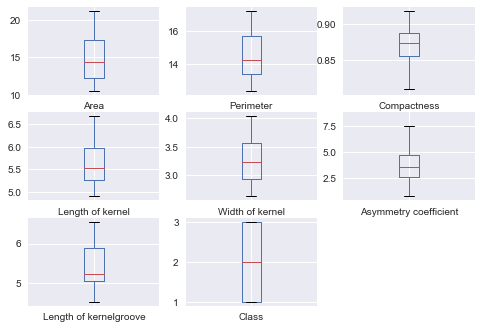

In [7]:
#Box and the whisker plots
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

C:\Users\SHIVAPRASAD\Anaconda2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


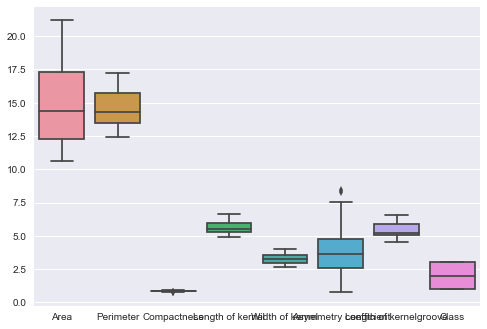

In [8]:
#Another type of plotting box plots
sns.boxplot(df)
pyplot.show()

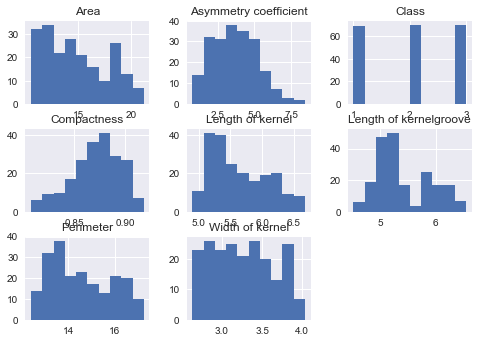

In [9]:
#Histograms
df.hist()
pyplot.show()

C:\Users\SHIVAPRASAD\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


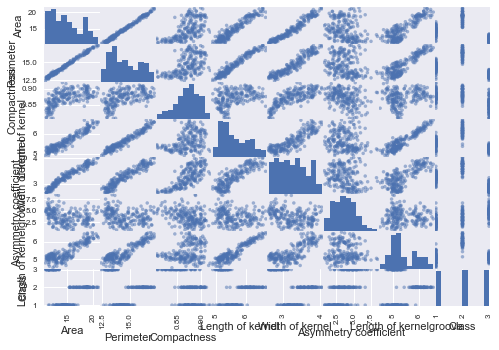

In [10]:
# scatter plot matrix
scatter_matrix(df)
pyplot.show()

 ## Evaluate Some Algorithms

In [11]:
# Split-out validation dataset
array = df.values
X = array[:,0:7]      
Y = array[:,7]      
validation_size = 0.20    
seed = 7                
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print X_train.shape
print X_validation.shape
print Y_train.shape
print Y_validation.shape

(167L, 7L)
(42L, 7L)
(167L,)
(42L,)


## Spot Check-Algorithms

In [12]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.909559 (0.049794)
LDA: 0.957721 (0.038216)
KNN: 0.909559 (0.078786)
CART: 0.904044 (0.055207)
NB: 0.892279 (0.063424)
SVM: 0.868015 (0.075246)


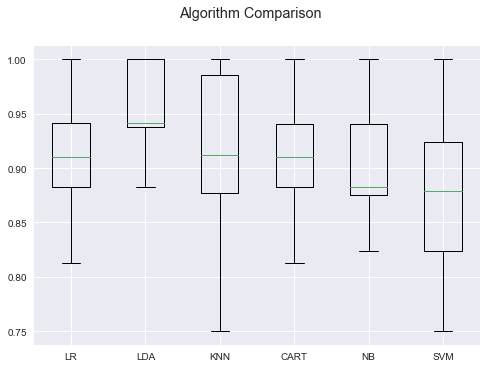

In [13]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Make Predictions

In [14]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.952380952381
[[ 9  0  2]
 [ 0 15  0]
 [ 0  0 16]]
             precision    recall  f1-score   support

        1.0       1.00      0.82      0.90        11
        2.0       1.00      1.00      1.00        15
        3.0       0.89      1.00      0.94        16

avg / total       0.96      0.95      0.95        42

